In [1]:
import pandas
import random
df = pandas.read_csv('Donnees_CSV/Especes.csv')

In [2]:
df

,Nom_Plante,Images_Plante
0,Daucus_carota,9012
1,Alliaria_petiolata,7922
2,Hypericum_perforatum,7675
3,Centranthus_ruber,6670
4,Cirsium_vulgare,6474
...,...,...
1076,Hernandia_nymphaeifolia,4
1077,Melampodium_perfoliatum,4
1078,Browallia_speciosa,4
1079,Pancratium_canariense,4


In [3]:
df['Rank']=df['Images_Plante'].rank(ascending=0)

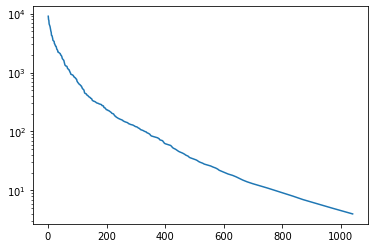

In [4]:
import matplotlib.pyplot as plt
plt.yscale('log')
plt.plot(df['Rank'], df['Images_Plante'])

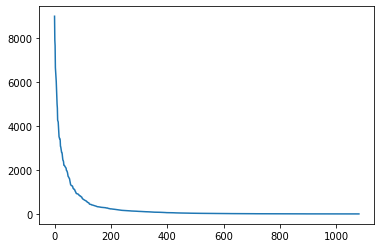

In [5]:
plt.plot(df['Images_Plante'])

In [6]:
df['Rank']

0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
         ...  
1076    1040.0
1077    1040.0
1078    1040.0
1079    1040.0
1080    1040.0
Name: Rank, Length: 1081, dtype: float64

In [7]:
from scipy.optimize import minimize
import math as m

In [8]:
#random.seed(1234)

## set a N
#n_extr=2
#N = len(df['Rank'][0:n_extr])
#print(N)
# N <- 10

## populate the negative log likelihood function for the Zipf-Mandelbrot model
#def negloglik(parms, x):
#  H =  sum(1/pow(k + parms[0],parms[1]) for k in range(1, N)) - sum(m.log(1/pow(x + parms[0],parms[1]/H))) 


## generate pmf for sampling
#plt.plot(range(1, 10), -negloglik([5,5], e))

## draw a random sample with n=1000
#e <- sample(range(1, 10), 1000, replace = T, prob = d)

## calculate ml estimates
#Res = minimize(negloglik([20,20], df['Images_Plante'][0:n_extr]), p=[20,20])
#ml

## generate pmf for sampling
#plot(d <- sapply(1:58, function(x) exp(-negloglik(ml$estimate, x))))

In [9]:
import numpy as np
import seaborn as sns
df

,Nom_Plante,Images_Plante,Rank
0,Daucus_carota,9012,1.0
1,Alliaria_petiolata,7922,2.0
2,Hypericum_perforatum,7675,3.0
3,Centranthus_ruber,6670,4.0
4,Cirsium_vulgare,6474,5.0
...,...,...,...
1076,Hernandia_nymphaeifolia,4,1040.0
1077,Melampodium_perfoliatum,4,1040.0
1078,Browallia_speciosa,4,1040.0
1079,Pancratium_canariense,4,1040.0


In [10]:
#Let's try the powerlaw package with the Species
import powerlaw

In [11]:
Images_Plante = df['Images_Plante'].values.tolist()
Images_Plante

[9012,
 7922,
 7675,
 6670,
 6474,
 6330,
 6047,
 5628,
 5357,
 5009,
 4828,
 4275,
 4236,
 4193,
 3980,
 3791,
 3514,
 3485,
 3424,
 3424,
 3376,
 3086,
 3061,
 2983,
 2914,
 2806,
 2803,
 2751,
 2627,
 2511,
 2442,
 2429,
 2375,
 2225,
 2220,
 2204,
 2197,
 2164,
 2146,
 2126,
 2108,
 2088,
 1997,
 1974,
 1964,
 1918,
 1881,
 1802,
 1724,
 1699,
 1686,
 1651,
 1629,
 1615,
 1532,
 1477,
 1400,
 1340,
 1322,
 1302,
 1291,
 1290,
 1285,
 1278,
 1261,
 1212,
 1168,
 1155,
 1155,
 1131,
 1114,
 1113,
 1093,
 1045,
 1031,
 994,
 982,
 936,
 932,
 928,
 926,
 916,
 914,
 910,
 905,
 889,
 882,
 853,
 847,
 831,
 827,
 827,
 812,
 808,
 788,
 778,
 776,
 760,
 715,
 708,
 688,
 679,
 672,
 662,
 652,
 641,
 630,
 628,
 624,
 616,
 608,
 599,
 593,
 591,
 570,
 564,
 540,
 536,
 526,
 522,
 514,
 514,
 500,
 475,
 451,
 447,
 444,
 440,
 439,
 435,
 433,
 421,
 413,
 413,
 411,
 407,
 404,
 397,
 390,
 387,
 384,
 380,
 378,
 377,
 366,
 366,
 365,
 363,
 360,
 350,
 341,
 335,
 334,
 331,
 

In [12]:
fit = powerlaw.Fit(Images_Plante)

Calculating best minimal value for power law fit


In [13]:
alpha_Species = fit.power_law.alpha
sigma_Species = fit.power_law.sigma
print(alpha_Species, sigma_Species)

1.6655656751820782 0.03418781232869543


In [14]:
fit.distribution_compare('power_law', 'exponential')

(116.28907090686701, 7.556124443251332e-08)

<AxesSubplot:>

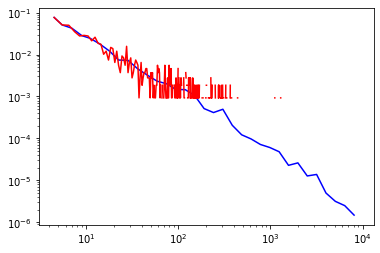

In [15]:
#Basic Methods
#Visualization
#PDF of our data with logarithmic and linear binning
powerlaw.plot_pdf(Images_Plante, color='b')
powerlaw.plot_pdf(Images_Plante, linear_bins=True, color='r')

<AxesSubplot:>

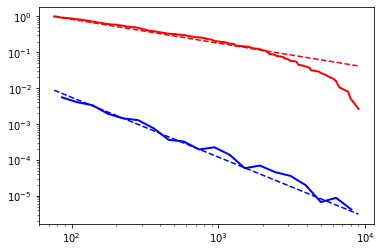

In [16]:
#PDF and CCDF of our data with powerlaw fit
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)
fit.plot_ccdf(color='r', linewidth=2, ax=fig2)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2)


In [17]:
x, y = fit.cdf()
print(x, y)
bin_edges, probability = fit.pdf()
print(bin_edges, probability)
y = fit.lognormal.cdf()
y = fit.lognormal.pdf()
print(y)

[  76.   77.   78.   79.   80.   81.   82.   83.   84.   85.   86.   88.
   90.   91.   92.   93.   94.   95.   96.   98.   99.  101.  102.  103.
  104.  105.  106.  107.  108.  112.  114.  115.  116.  118.  120.  121.
  123.  124.  126.  127.  128.  129.  130.  131.  132.  134.  135.  136.
  137.  139.  141.  142.  143.  144.  145.  146.  147.  148.  150.  151.
  152.  155.  156.  157.  158.  159.  160.  161.  163.  164.  165.  166.
  167.  168.  169.  171.  173.  175.  177.  181.  182.  183.  184.  185.
  191.  194.  198.  199.  201.  202.  205.  210.  212.  213.  214.  218.
  219.  221.  225.  226.  227.  231.  232.  233.  235.  243.  248.  251.
  252.  254.  256.  267.  272.  273.  274.  275.  285.  287.  288.  290.
  291.  292.  293.  294.  295.  298.  299.  302.  303.  304.  305.  306.
  307.  309.  314.  319.  321.  324.  325.  326.  327.  331.  334.  335.
  341.  350.  360.  363.  365.  366.  377.  378.  380.  384.  387.  390.
  397.  404.  407.  411.  413.  421.  433.  435.  4

In [18]:
#Finding the optimal scaling range xmin, the one that results in the minimal KS distance, D
fit = powerlaw.Fit(Images_Plante)

Calculating best minimal value for power law fit


In [19]:
fit.xmin

76.0

In [20]:
fit.fixed_xmin

False

In [21]:
fit.power_law.alpha

1.6655656751820782

In [22]:
fit.power_law.D

0.07068497345290015

In [23]:
fit2 = powerlaw.Fit(Images_Plante, xmin=1.0)
fit2.xmin

1.0

In [24]:
fit2.fixed_xmin

True

In [25]:
fit2.power_law.alpha

1.269711039361097

In [26]:
fit2.power_law.D

0.31195352537148724

In [27]:
#Continuous vs discrete data
fit = powerlaw.Fit(Images_Plante)
fit.discrete

Calculating best minimal value for power law fit


False

In [28]:
fit3 = powerlaw.Fit(Images_Plante, discrete=True)
fit3.discrete

Calculating best minimal value for power law fit


True

In [29]:
#Comparing candidate distributions
# We have to compare the fit of several candidate distributions and identify which one fits the best
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print(R, p)
# If R is positive then the first ditribution proposed, power_law fits better our data than exponential


5.377418866548815 7.556124443251332e-08


In [30]:
fit.supported_distributions


{'power_law': powerlaw.Power_Law,
 'lognormal': powerlaw.Lognormal,
 'exponential': powerlaw.Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'lognormal_positive': powerlaw.Lognormal_Positive}

In [31]:
R2, p2 = fit.distribution_compare('power_law', 'lognormal', normalized_ratio=True)
print(R2, p2)

-3.482959821666425 0.000495902784078453


<AxesSubplot:>

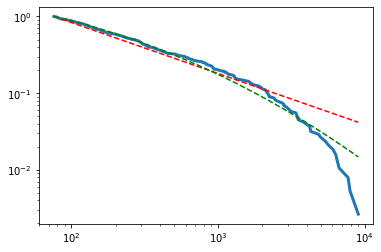

In [32]:
fig4 = fit.plot_ccdf(linewidth=3)
fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--')
fit.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--')

In [33]:
R3, p3 = fit.distribution_compare('lognormal', 'truncated_power_law', normalized_ratio=True)
print(R3, p3)

-3.675553845836237 0.0002373339750012467


<AxesSubplot:>

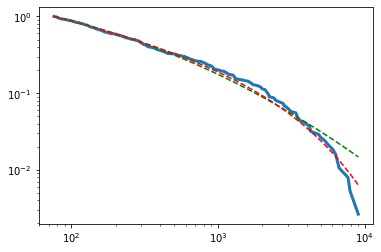

In [34]:
fig5 = fit.plot_ccdf(linewidth=3)
fit.lognormal.plot_ccdf(ax=fig5, color='g', linestyle='--')
fit.truncated_power_law.plot_ccdf(ax=fig5, color='r', linestyle='--')

AttributeError: 'list' object has no attribute 'plot'

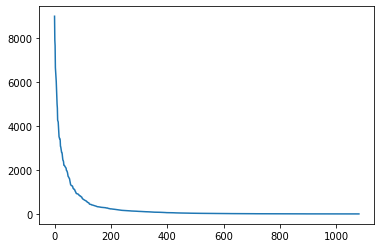

In [69]:
fig10 = plt.plot(Images_Plante)
fit.truncated_power_law.plot_pdf(ax=fig10)

In [35]:
R4, p4 = fit.distribution_compare('truncated_power_law', 'stretched_exponential', normalized_ratio=True)
print(R4, p4)

3.2717498983481725 0.001068840820731082


In [36]:
R5, p5 = fit.distribution_compare('truncated_power_law', 'lognormal_positive', normalized_ratio=True)
print(R5, p5)
#And thus the best fit is the truncated_power_law, it is to be noted that this distribution has 2 degrees of freedom and therefore
#a fitting advantage compared to the lognormal

3.675553845836237 0.0002373339750012467


In [37]:
#Obtenons les paramètres de notre truncated power_law
fit.truncated_power_law.parameter1

1.3585089170471614

In [38]:
fit.truncated_power_law.parameter2

0.0001862394615973467

<AxesSubplot:>

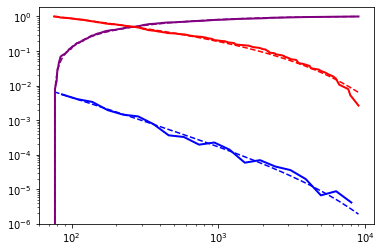

In [39]:
#PDF, CDF and CCDF of our data with the best fit, truncated_power_law fit
fig8 = fit.plot_pdf(color='b', linewidth=2)
fit.truncated_power_law.plot_pdf(color='b', linestyle='--', ax=fig8)
fit.plot_cdf(color='purple', linewidth=2, ax=fig8)
fit.truncated_power_law.plot_cdf(color='purple', linestyle='--', ax=fig8)
fit.plot_ccdf(color='r', linewidth=2, ax=fig8)
fit.truncated_power_law.plot_ccdf(color='r', linestyle='--', ax=fig8)

<AxesSubplot:>

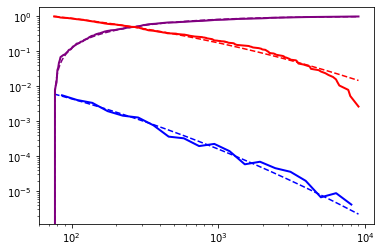

In [40]:
#PDF, CDF and CCDF of our data with the best fit with only degree of freedom, lognormal fit
fig9 = fit.plot_pdf(color='b', linewidth=2)
fit.lognormal.plot_pdf(color='b', linestyle='--', ax=fig9)
fit.plot_cdf(color='purple', linewidth=2, ax=fig9)
fit.lognormal.plot_cdf(color='purple', linestyle='--', ax=fig9)
fit.plot_ccdf(color='r', linewidth=2, ax=fig9)
fit.lognormal.plot_ccdf(color='r', linestyle='--', ax=fig9)

In [41]:
#plt.plot(Images_Genre)

In [42]:
#Generas
df2 = pandas.read_csv('Donnees_CSV/Especes2.csv')
df2

,Genre,Images_Genre
0,Trifolium,18333
1,Sedum,16920
2,Anemone,16162
3,Lamium,15485
4,Cirsium,15124
...,...,...
298,Xylococcus,4
299,Heteromorpha,4
300,Atractocarpus,4
301,Coryphantha,4


In [43]:
df2['Rank']=df2['Images_Genre'].rank(ascending=0)
df2

,Genre,Images_Genre,Rank
0,Trifolium,18333,1.0
1,Sedum,16920,2.0
2,Anemone,16162,3.0
3,Lamium,15485,4.0
4,Cirsium,15124,5.0
...,...,...,...
298,Xylococcus,4,295.0
299,Heteromorpha,4,295.0
300,Atractocarpus,4,295.0
301,Coryphantha,4,295.0


In [44]:
Images_Genre = df2['Images_Genre'].values.tolist()
Images_Genre

[18333,
 16920,
 16162,
 15485,
 15124,
 14979,
 10766,
 9557,
 9039,
 8574,
 7735,
 7579,
 7437,
 7015,
 6828,
 5684,
 5464,
 4604,
 4415,
 4155,
 4019,
 3543,
 3514,
 3485,
 3405,
 3349,
 3094,
 3016,
 2983,
 2958,
 2694,
 2632,
 2611,
 2589,
 2511,
 2506,
 2460,
 2164,
 2092,
 2026,
 1914,
 1837,
 1784,
 1700,
 1615,
 1479,
 1452,
 1403,
 1358,
 1356,
 1288,
 1226,
 1155,
 1117,
 988,
 923,
 917,
 905,
 872,
 812,
 795,
 707,
 679,
 641,
 596,
 595,
 593,
 549,
 548,
 544,
 526,
 483,
 470,
 462,
 457,
 454,
 429,
 417,
 416,
 413,
 400,
 386,
 380,
 378,
 366,
 366,
 366,
 345,
 315,
 306,
 302,
 295,
 292,
 275,
 274,
 269,
 268,
 251,
 249,
 243,
 240,
 235,
 229,
 219,
 214,
 212,
 201,
 193,
 191,
 189,
 183,
 181,
 177,
 176,
 165,
 161,
 157,
 156,
 154,
 154,
 151,
 150,
 147,
 141,
 135,
 125,
 124,
 123,
 118,
 112,
 111,
 111,
 103,
 99,
 95,
 92,
 88,
 88,
 88,
 85,
 78,
 76,
 72,
 71,
 69,
 64,
 63,
 60,
 60,
 59,
 56,
 52,
 50,
 49,
 48,
 48,
 48,
 47,
 47,
 47,
 47,
 

In [45]:
fit11 = powerlaw.Fit(Images_Genre)

Calculating best minimal value for power law fit


<AxesSubplot:>

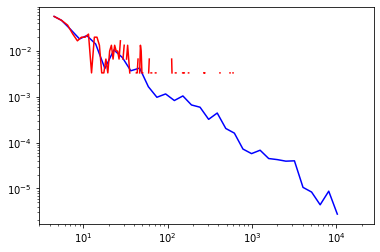

In [46]:
#Basic Methods
#Visualization
#PDF of our data with logarithmic and linear binning
powerlaw.plot_pdf(Images_Genre, color='b')
powerlaw.plot_pdf(Images_Genre, linear_bins=True, color='r')

In [47]:
fit11.xmin

4.0

In [48]:
fit11.power_law.alpha

1.3235176384799792

In [49]:
#Comparing candidate distributions
# We have to compare the fit of several candidate distributions and identify which one fits the best
R11, p11 = fit11.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print(R11, p11)
# If R is positive then the first ditribution proposed, power_law fits better our data than exponential

9.577638618177119 9.928900131490675e-22


In [50]:
R12, p12 = fit11.distribution_compare('power_law', 'lognormal', normalized_ratio=True)
print(R12, p12)

-3.597229548633242 0.00032162462910655847


In [51]:
R13, p13 = fit11.distribution_compare('lognormal', 'truncated_power_law', normalized_ratio=True)
print(R13, p13)

-4.789757773697255 1.6698276227876321e-06


In [52]:
R14, p14 = fit11.distribution_compare('stretched_exponential', 'truncated_power_law', normalized_ratio=True)
print(R14, p14)

-4.02713599468706 5.646037940395693e-05


In [53]:
R15, p15 = fit11.distribution_compare('truncated_power_law', 'lognormal_positive', normalized_ratio=True)
print(R15, p15)
#And thus the best fit is the truncated_power_law, it is to be noted that this distribution has 2 degrees of freedom and therefore
#a fitting advantage compared to the lognormal

4.789653031368119 1.6706994433448597e-06


In [54]:
#Obtenons les paramètres de notre truncated power_law
fit11.truncated_power_law.parameter1

1.1563381402888804

In [55]:
fit11.truncated_power_law.parameter2

6.98002359884857e-05

<AxesSubplot:>

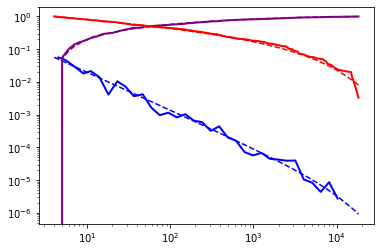

In [56]:
#PDF, CDF and CCDF of our data with the best fit, truncated_power_law fit
fig6 = fit11.plot_pdf(color='b', linewidth=2)
fit11.truncated_power_law.plot_pdf(color='b', linestyle='--', ax=fig6)
fit11.plot_cdf(color='purple', linewidth=2, ax=fig6)
fit11.truncated_power_law.plot_cdf(color='purple', linestyle='--', ax=fig6)
fit11.plot_ccdf(color='r', linewidth=2, ax=fig6)
fit11.truncated_power_law.plot_ccdf(color='r', linestyle='--', ax=fig6)


<AxesSubplot:>

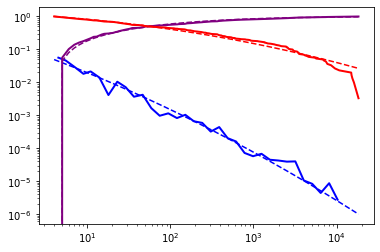

In [57]:
#PDF, CDF and CCDF of our data with the best fit with only degree of freedom, lognormal fit
fig7 = fit11.plot_pdf(color='b', linewidth=2)
fit11.lognormal.plot_pdf(color='b', linestyle='--', ax=fig7)
fit11.plot_cdf(color='purple', linewidth=2, ax=fig7)
fit11.lognormal.plot_cdf(color='purple', linestyle='--', ax=fig7)
fit11.plot_ccdf(color='r', linewidth=2, ax=fig7)
fit11.lognormal.plot_ccdf(color='r', linestyle='--', ax=fig7)


In [58]:
# Principal individual generas
df20 = pandas.read_csv('Donnees_CSV/Especes_Acacia.csv')
Images_Acacia = df20['Images_Acacia'].values.tolist()
fit20 = powerlaw.Fit(Images_Acacia)
R20, p20 = fit20.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print("Comparaison entre power_law et exponential:",R20, p20)
R21, p21 = fit20.distribution_compare('power_law', 'lognormal', normalized_ratio=True)
print("Comparaison entre power_law et lognormal:",R21, p21)
R22, p22 = fit20.distribution_compare('lognormal', 'truncated_power_law', normalized_ratio=True)
print("Comparaison entre lognormal et truncated_power_law:",R22, p22)
R23, p23 = fit20.distribution_compare('stretched_exponential', 'truncated_power_law', normalized_ratio=True)
print("Comparaison entre stretched_exponential et truncated_power_law:",R23, p23)
R24, p24 = fit20.distribution_compare('truncated_power_law', 'lognormal_positive', normalized_ratio=True)
print("Comparaison entre truncated_power_law et lognormal_positive:",R24, p24)

Calculating best minimal value for power law fit
Comparaison entre power_law et exponential: 2.109689410768153 0.03488511719533152
Comparaison entre power_law et lognormal: -0.6428948853370874 0.5202923084197333
Comparaison entre lognormal et truncated_power_law: -0.48148146558900157 0.630174349460052
Comparaison entre stretched_exponential et truncated_power_law: -0.33303601204556993 0.7391070996152833
Comparaison entre truncated_power_law et lognormal_positive: 0.375757044478288 0.7070975249282703


In [59]:
df20

,Especes_Acacia,Images_Acacia
0,Acacia_dealbata,1285
1,Acacia_retinodes,325
2,Acacia_longifolia,130
3,Acacia_mearnsii,130
4,Acacia_saligna,105
5,Acacia_melanoxylon,104
6,Acacia_baileyana,71
7,Acacia_pycnantha,57
8,Acacia_heterophylla,50
9,Acacia_auriculiformis,34


In [60]:
df_Sedum = pandas.read_csv('Donnees_CSV/Especes_Sedum.csv')
df_Acacia = pandas.read_csv('Donnees_CSV/Especes_Acacia.csv')
df_Trifolium = pandas.read_csv('Donnees_CSV/Especes_Trifolium.csv')
df_Hypericum = pandas.read_csv('Donnees_CSV/Especes_Hypericum.csv')
df_Ophrys = pandas.read_csv('Donnees_CSV/Especes_Ophrys.csv')
df_Anemone = pandas.read_csv('Donnees_CSV/Especes_Anemone.csv')
df_Cirsium = pandas.read_csv('Donnees_CSV/Especes_Cirsium.csv')
df_Pelargonium = pandas.read_csv('Donnees_CSV/Especes_Pelargonium.csv')
df_Peperomia = pandas.read_csv('Donnees_CSV/Especes_Peperomia.csv')
df_Lupinus = pandas.read_csv('Donnees_CSV/Especes_Lupinus.csv')
#df_Lamium = pandas.read_csv('Donnees_CSV/Especes_Lamium.csv')
#df_Lavandula = pandas.read_csv('Donnees_CSV/Especes_Lavandula.csv')
#df_Lupinus = pandas.read_csv('Donnees_CSV/Especes_Lupinus.csv')
#df_Mercurialis = pandas.read_csv('Donnees_CSV/Especes_Mercurialis.csv')
#df_Nymphaea = pandas.read_csv('Donnees_CSV/Especes_Nymphaea.csv')
#df_Ophrys = pandas.read_csv('Donnees_CSV/Especes_Ophrys.csv')
Images_Sedum = df_Sedum['Images_Sedum'].values.tolist()
Images_Trifolium = df_Trifolium['Images_Trifolium'].values.tolist()
Images_Hypericum = df_Hypericum['Images_Hypericum'].values.tolist()
Images_Ophrys = df_Ophrys['Images_Ophrys'].values.tolist()
Images_Anemone = df_Anemone['Images_Anemone'].values.tolist()
Images_Cirsium = df_Cirsium['Images_Cirsium'].values.tolist()
Images_Pelargonium = df_Pelargonium['Images_Pelargonium'].values.tolist()
Images_Peperomia = df_Peperomia['Images_Peperomia'].values.tolist()
Images_Lupinus = df_Lupinus['Images_Lupinus'].values.tolist()

In [61]:
Liste = [Images_Sedum, Images_Acacia, Images_Trifolium, Images_Hypericum, Images_Ophrys, Images_Anemone, Images_Cirsium, Images_Pelargonium, Images_Peperomia, Images_Lupinus]
Liste2 = ["Sedum", "Acacia", "Trifolium", "Hypericum", "Ophrys", "Anemone", "Cirsium", "Pelargonium", "Peperomia", "Lupinus"]
print(len(Liste2))

10


In [62]:
for i in range(len(Liste)):
    print(Liste2[i])
    fit21 = powerlaw.Fit(Liste[i])
    R20, p20 = fit21.distribution_compare('power_law', 'exponential', normalized_ratio=True)
    print("Comparaison entre power_law et exponential:",R20, p20)
    R21, p21 = fit21.distribution_compare('power_law', 'lognormal', normalized_ratio=True)
    print("Comparaison entre power_law et lognormal:",R21, p21)
    R22, p22 = fit21.distribution_compare('lognormal', 'truncated_power_law', normalized_ratio=True)
    print("Comparaison entre lognormal et truncated_power_law:",R22, p22)
    R23, p23 = fit21.distribution_compare('stretched_exponential', 'truncated_power_law', normalized_ratio=True)
    print("Comparaison entre stretched_exponential et truncated_power_law:",R23, p23)
    R24, p24 = fit21.distribution_compare('truncated_power_law', 'lognormal_positive', normalized_ratio=True)
    print("Comparaison entre truncated_power_law et lognormal_positive:",R24, p24)
    

Sedum
Calculating best minimal value for power law fit
Comparaison entre power_law et exponential: 2.228349611357311 0.025857210435197005
Comparaison entre power_law et lognormal: -0.40208572620886907 0.6876209371745894
Comparaison entre lognormal et truncated_power_law: -1.4282145086157374 0.1532301258450771
Comparaison entre stretched_exponential et truncated_power_law: -1.8339139428050408 0.06666676955389593
Comparaison entre truncated_power_law et lognormal_positive: 1.850858098356187 0.06418997022194821
Acacia
Calculating best minimal value for power law fit
Comparaison entre power_law et exponential: 2.109689410768153 0.03488511719533152
Comparaison entre power_law et lognormal: -0.6428948853370874 0.5202923084197333
Comparaison entre lognormal et truncated_power_law: -0.48148146558900157 0.630174349460052
Comparaison entre stretched_exponential et truncated_power_law: -0.33303601204556993 0.7391070996152833
Comparaison entre truncated_power_law et lognormal_positive: 0.375757044

C:\Users\nilsr\anaconda3\envs\pytorch\lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Comparaison entre stretched_exponential et truncated_power_law: -1.2068762417338592 0.2274798085744919
Comparaison entre truncated_power_law et lognormal_positive: 1.1044117490357264 0.26941456649538675
Anemone
Calculating best minimal value for power law fit
Comparaison entre power_law et exponential: 1.338197653758915 0.18083201375665214
Comparaison entre power_law et lognormal: -0.9969628259573462 0.31878255430774627
Comparaison entre lognormal et truncated_power_law: -2.4493636889393473 0.014310886613448887
Comparaison entre stretched_exponential et truncated_power_law: -2.5408070385114025 0.011059693874991748
Comparaison entre truncated_power_law et lognormal_positive: 2.4493636889393473 0.014310886613448887
Cirsium
Calculating best minimal value for power law fit
Comparaison entre power_law et exponential: 2.8924123724223647 0.0038229580768606086
Comparaison entre power_law et lognormal: -1.2024759125967146 0.22917919307671653
Comparaison entre lognormal et truncated_power_law: -

'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


 -0.3570215722770002 0.7210756562313083
Comparaison entre truncated_power_law et lognormal_positive: 0.5457427644720306 0.5852427714811554
Lupinus
Calculating best minimal value for power law fit
Comparaison entre power_law et exponential: 3.128474376683691 0.0017571633109430425
Comparaison entre power_law et lognormal: -0.07136058812479869 0.9431107757286246
Comparaison entre lognormal et truncated_power_law: -0.8362698104048522 0.4030031328820076
Comparaison entre stretched_exponential et truncated_power_law: -1.0020265052010584 0.31633079170557
Comparaison entre truncated_power_law et lognormal_positive: 0.9362911982258404 0.3491232786927828


Sedum
Calculating best minimal value for power law fit
Comparaison entre lognormal et truncated_power_law: -1.4282145086157374 0.1532301258450771


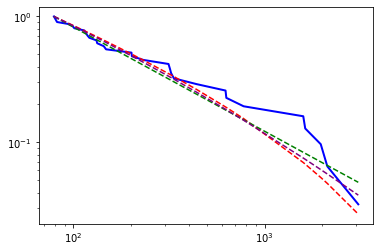

Acacia
Calculating best minimal value for power law fit
Comparaison entre lognormal et truncated_power_law: -0.48148146558900157 0.630174349460052


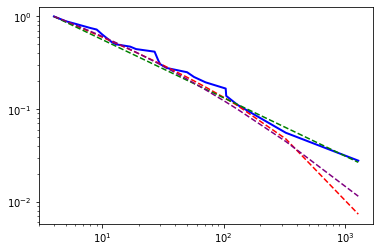

Trifolium
Calculating best minimal value for power law fit
Comparaison entre lognormal et truncated_power_law: -0.5470211044647935 0.5843642330745882


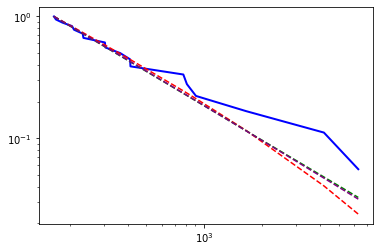

Hypericum
Calculating best minimal value for power law fit
Comparaison entre lognormal et truncated_power_law: -1.0826294340504072 0.27897293713112603


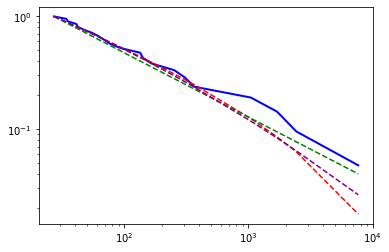

Ophrys
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Comparaison entre lognormal et truncated_power_law: 1.1801321395053843 0.2379476636592076


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


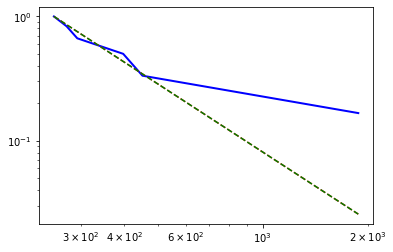

Anemone
Calculating best minimal value for power law fit
Comparaison entre lognormal et truncated_power_law: -2.4493636889393473 0.014310886613448887


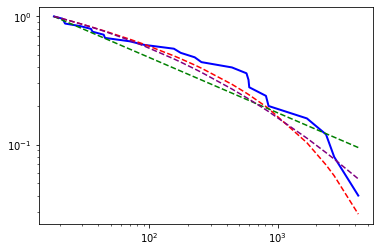

Cirsium
Calculating best minimal value for power law fit
Comparaison entre lognormal et truncated_power_law: -0.9062132761925612 0.36482297732515456


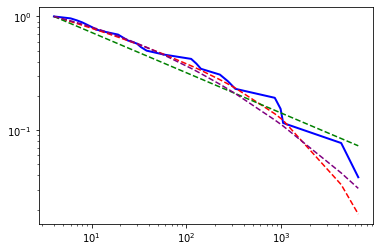

Pelargonium
Calculating best minimal value for power law fit
Comparaison entre lognormal et truncated_power_law: -1.2777434403277033 0.20133990292277693


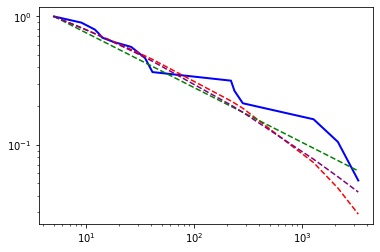

Peperomia
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Comparaison entre lognormal et truncated_power_law: -0.1038187452494299 0.9173131902973568


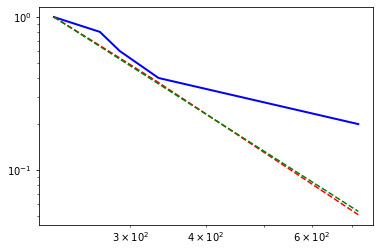

Lupinus
Calculating best minimal value for power law fit
Comparaison entre lognormal et truncated_power_law: -0.8362698104048522 0.4030031328820076


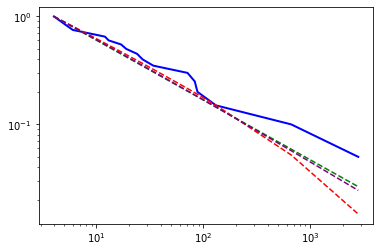

In [96]:
Liste3 = []
for i in range(len(Liste)):
    print(Liste2[i])
    fit31 = powerlaw.Fit(Liste[i])
    Liste3.append(fit31)
    R32, p32 = fit31.distribution_compare('lognormal', 'truncated_power_law', normalized_ratio=True)
    print("Comparaison entre lognormal et truncated_power_law:",R32, p32)
    plt.figure()
    fig6 = fit31.plot_ccdf(color='b', linewidth=2)
    fit31.truncated_power_law.plot_ccdf(color='r', linestyle='--', ax=fig6)
    fit31.power_law.plot_ccdf(color='g', linestyle='--', ax=fig6)
    fit31.lognormal.plot_ccdf(color='purple', linestyle='--', ax=fig6)
    plt.show()

In [92]:
print(Liste3[1].power_law.alpha)

1.6280795912670158


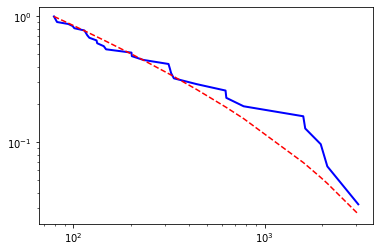

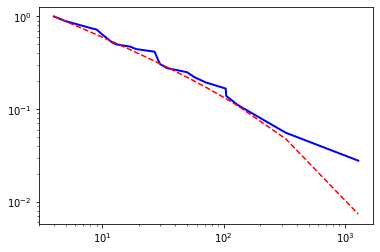

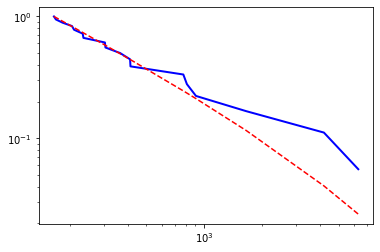

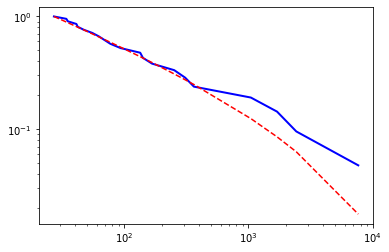

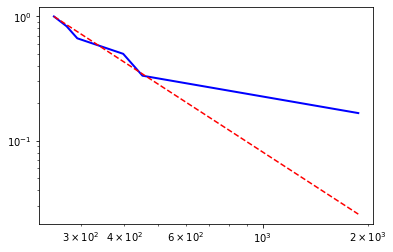

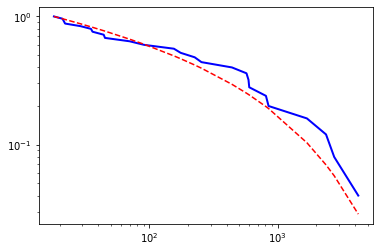

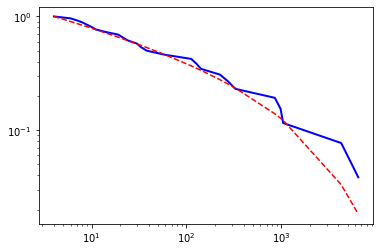

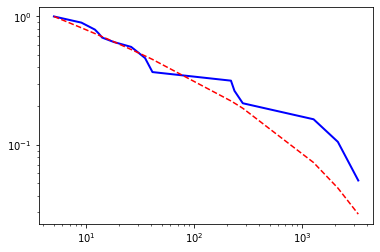

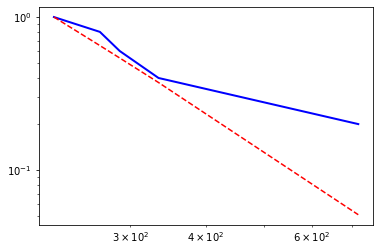

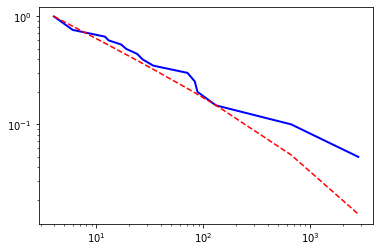

In [95]:
#PDF, CDF and CCDF of our data with the best fit, truncated_power_law fit
for i in range(len(Liste)):
    plt.figure()
    fig6 = Liste3[i].plot_ccdf(color='b', linewidth=2)
    Liste3[i].truncated_power_law.plot_ccdf(color='r', linestyle='--', ax=fig6)
    plt.show()
